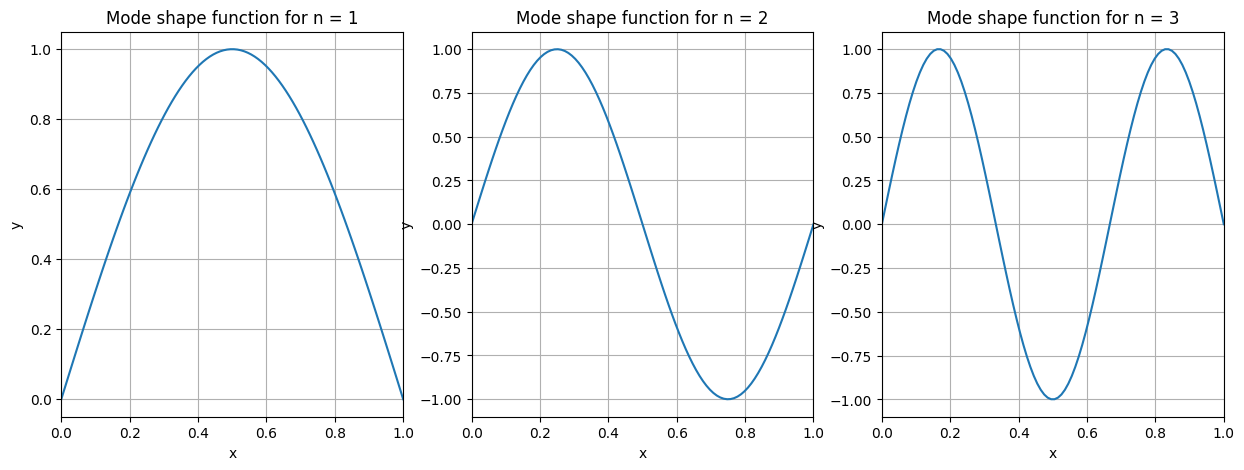

In [1]:
import numpy as np
import matplotlib.pyplot as plt
E=70e9
rho=2700
L=1
b=1e-2
h=1e-3

I=b*h**3/12; A=b*h

x=np.linspace(0,L,100)

 

# Mode shape function

def mshape(x,L,n):
    y=np.sin(n*np.pi*x*L)
    return y

def nfreq(E,rho,L,I,A,n):
    w=(n**2*np.pi**2/L**2)*np.sqrt(E*I/(rho*A))
    return w

fig1, axes1 = plt.subplots(1,3,figsize=(15,5))

for i in range(1,3+1):
    md=mshape(x,L,i)
    axes1[i-1].plot(x,md[0:100])
    axes1[i-1].set_title('Mode shape function for n = %d' %i)
    axes1[i-1].set_xlabel('x')
    axes1[i-1].set_ylabel('y')
    axes1[i-1].grid()
    axes1[i-1].set_xmargin(0)
 

In [2]:
# create a matrix where each column is a mode shape function I want to make subsequent addition 
# of mode shapes easier
md = None  # initialize to None so we can check if the matrix has been created yet or not
n = 3 # number of mode shapes to create
for i in range(1,n+1): # loop over the number of mode shapes to create 
    if md is None:
        md = mshape(x,L,i) # create the firrst column
    else:
        md = np.vstack((md,mshape(x,L,i))) # add subsequent columns
print(f"let s check the shape of the matrix: {md.shape}")

# or we can do it in one line using a list comprehension
md = np.array([mshape(x,L,i) for i in range(1,n+1)])

let s check the shape of the matrix: (3, 100)


Text(0, 0.5, 'X/F')

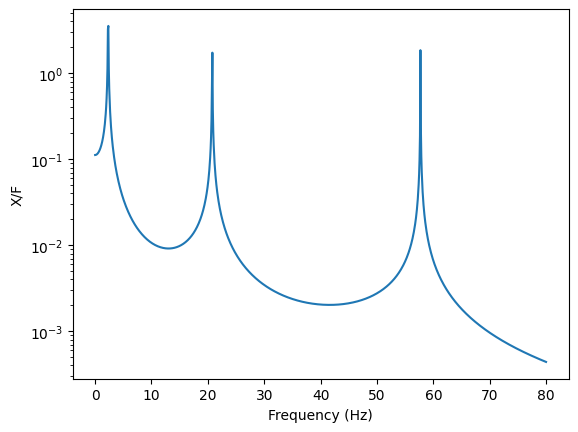

In [3]:
n = 5
nlist = np.arange(1, n+1)
wn = nfreq(E, rho, L, I, A, nlist)  

mun = rho * A * L / 2 * np.ones((n, 1))
xn = L / 3
xf = L / 2
xin = np.zeros((n))
w = np.linspace(0, 80 * 2 * np.pi, 1024)

# Compute response
def FRF(w, xn, xf, mun, wn, xin, n):
    U = np.zeros((1, np.size(w)),dtype=complex) # initialize the response vector type complex
    # it is weird that we have to precise the type of the array, but yeah, it is what it is
    for i1 in range(0, n):
        Fi = np.sin((i1 + 1) * np.pi * xf / L)
        zi = Fi / (-mun[i1] * w**2 + mun[i1] * wn[i1]**2 + 2 * 1j * w * wn[i1] * xin[i1])
        U += zi * np.sin((i1 + 1) * xn / L)
    return U

H = FRF(w, xn, xf, mun, wn, xin, n)
plt.figure(2)
plt.semilogy(w / (2 * np.pi), np.abs(H).T) # transpose the matrix to have the right shape
                                          # because the H was a column vector (1,1024)
                                         # while w is a row vector (1024, ) empty dimension means 1
plt.xlabel('Frequency (Hz)')
plt.ylabel('X/F')


In [18]:
H

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]])